In [75]:
#access gdrive diles
from google.colab import drive
drive.mount('/content/drive')

#import all the necessary library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
#read the csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/income_set.csv')
df

,Name,Age,Income,Kmeans Clustering (Unsupervised)
0,"ALBERTO, JOHN PAULO OCHAVE",27,70000,NaN
1,"ATIENZA, CHARLES ADRIAN LANDICHO",29,90000,NaN
2,"BAYANI, JOHN ERIC",29,61000,NaN
3,"BORABO, JOHN ANDREW GOPELA",28,60000,NaN
4,"BRUCE, NICOLAS ADAM REYES",42,150000,NaN
5,"CABANLIG, RUTH GRACE GALENG",39,155000,NaN
6,"CREENCIA, KIAN CARL MIKO MENDOZA",41,160000,NaN
7,"DELA CRUZ, KIMBERLY MENORO",38,162000,NaN
8,"DELOS SANTOS, ALLEN KURT POMPERADA",36,156000,NaN
9,"ENIERGA, DAVID CHRISTOPHER JR. ARANEZ",35,130000,NaN


In [77]:
#removes column "Kmeans Clustering (Unsupervised)"
df = df[['Name' , 'Age' , 'Income']]
df.head(5)

,Name,Age,Income
0,"ALBERTO, JOHN PAULO OCHAVE",27,70000
1,"ATIENZA, CHARLES ADRIAN LANDICHO",29,90000
2,"BAYANI, JOHN ERIC",29,61000
3,"BORABO, JOHN ANDREW GOPELA",28,60000
4,"BRUCE, NICOLAS ADAM REYES",42,150000


Text(0.5, 1.0, 'Age vs Income')

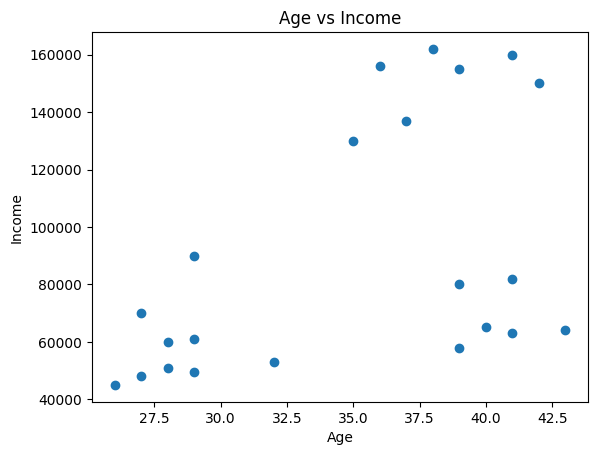

In [78]:
#scatter the original data for visuals
plt.scatter(df['Age'] , df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')

In [79]:
# Performs K-Means clustering on the 'Age' and 'Income' data
# to group the data points into 3 clusters.
km = KMeans (n_clusters = 3)
y_predicted = km.fit_predict(df[['Age' , 'Income']])
y_predicted

array([2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [80]:
# Add a new column 'cluster' to the DataFrame 'df' to store the predicted cluster assignments
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,"ALBERTO, JOHN PAULO OCHAVE",27,70000,2
1,"ATIENZA, CHARLES ADRIAN LANDICHO",29,90000,0
2,"BAYANI, JOHN ERIC",29,61000,2
3,"BORABO, JOHN ANDREW GOPELA",28,60000,2
4,"BRUCE, NICOLAS ADAM REYES",42,150000,1


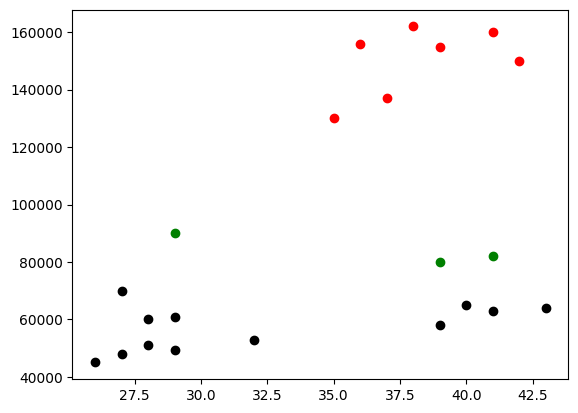

In [81]:
# Create separate DataFrames for each cluster
df1 = df[df['cluster'] == 0]  # DataFrame for cluster 0
df2 = df[df['cluster'] == 1]  # DataFrame for cluster 1
df3 = df[df['cluster'] == 2]  # DataFrame for cluster 2

# Create a scatter plot for each cluster with different colors
plt.scatter(df1['Age'], df1['Income'], color='green')  # Cluster 0 in green
plt.scatter(df2['Age'], df2['Income'], color='red')    # Cluster 1 in red
plt.scatter(df3['Age'], df3['Income'], color='black')   # Cluster 2 in black

In [82]:
# Performs Min-Max scaling on the 'Income' and 'Age' features to scale them to a range of 0 to 1.
# Formula: X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
scalar = MinMaxScaler()

scalar.fit(df[['Income']])
df[['Income_T']] = scalar.transform(df[['Income']])

scalar.fit(df[['Age']])
df[['Age_T']] = scalar.transform(df[['Age']])
df

,Name,Age,Income,cluster,Income_T,Age_T
0,"ALBERTO, JOHN PAULO OCHAVE",27,70000,2,0.213675,0.058824
1,"ATIENZA, CHARLES ADRIAN LANDICHO",29,90000,0,0.384615,0.176471
2,"BAYANI, JOHN ERIC",29,61000,2,0.136752,0.176471
3,"BORABO, JOHN ANDREW GOPELA",28,60000,2,0.128205,0.117647
4,"BRUCE, NICOLAS ADAM REYES",42,150000,1,0.897436,0.941176
5,"CABANLIG, RUTH GRACE GALENG",39,155000,1,0.940171,0.764706
6,"CREENCIA, KIAN CARL MIKO MENDOZA",41,160000,1,0.982906,0.882353
7,"DELA CRUZ, KIMBERLY MENORO",38,162000,1,1.000000,0.705882
8,"DELOS SANTOS, ALLEN KURT POMPERADA",36,156000,1,0.948718,0.588235
9,"ENIERGA, DAVID CHRISTOPHER JR. ARANEZ",35,130000,1,0.726496,0.529412


In [83]:
# Performs K-Means clustering on the scaled 'Age_T' and 'Income_T' data
# to group the data points into 3 clusters.
km = KMeans (n_clusters = 3)
y_predicted = km.fit_predict(df[['Age_T' , 'Income_T']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [84]:
# Add a new column 'cluster' to the DataFrame 'df' to store the predicted cluster assignments
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster,Income_T,Age_T
0,"ALBERTO, JOHN PAULO OCHAVE",27,70000,0,0.213675,0.058824
1,"ATIENZA, CHARLES ADRIAN LANDICHO",29,90000,0,0.384615,0.176471
2,"BAYANI, JOHN ERIC",29,61000,0,0.136752,0.176471
3,"BORABO, JOHN ANDREW GOPELA",28,60000,0,0.128205,0.117647
4,"BRUCE, NICOLAS ADAM REYES",42,150000,1,0.897436,0.941176


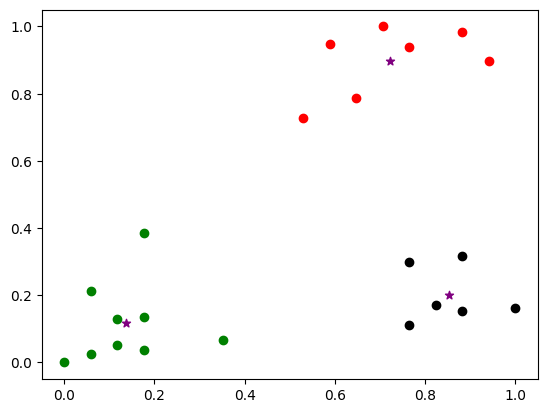

In [85]:
km.cluster_centers_

# Create separate DataFrames for each cluster
df1 = df[df['cluster'] == 0]  # DataFrame for cluster 0
df2 = df[df['cluster'] == 1]  # DataFrame for cluster 1
df3 = df[df['cluster'] == 2]  # DataFrame for cluster 2

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker="*")

# Create a scatter plot for each cluster with different colors
plt.scatter(df1['Age_T'], df1['Income_T'], color='green')  # Cluster 0 in green
plt.scatter(df2['Age_T'], df2['Income_T'], color='red')    # Cluster 1 in red
plt.scatter(df3['Age_T'], df3['Income_T'], color='black')   # Cluster 2 in black
